# Loop 99 Analysis: CV-LB Relationship and Strategy Assessment

**Goal**: Understand why we're stuck at LB=0.0877 when target is 0.0347

**Key Questions**:
1. What is the CV-LB relationship?
2. Is the intercept problem fixable?
3. What are top kernels doing differently?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print(f'Total submissions with LB: {len(df)}')
print(df)

Total submissions with LB: 13
        exp      cv      lb
0   exp_000  0.0111  0.0982
1   exp_001  0.0123  0.1065
2   exp_003  0.0105  0.0972
3   exp_005  0.0104  0.0969
4   exp_006  0.0097  0.0946
5   exp_007  0.0093  0.0932
6   exp_009  0.0092  0.0936
7   exp_012  0.0090  0.0913
8   exp_024  0.0087  0.0893
9   exp_026  0.0085  0.0887
10  exp_030  0.0083  0.0877
11  exp_035  0.0098  0.0970
12  exp_067  0.0083  0.0877


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print(f'\n=== CV-LB Relationship ===')
print(f'LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'\nIntercept = {intercept:.4f}')
print(f'Target LB = 0.0347')
print(f'\nCRITICAL: Intercept ({intercept:.4f}) > Target ({0.0347})')
print(f'Gap: {intercept - 0.0347:.4f} ({(intercept - 0.0347)/0.0347*100:.1f}% above target)')

# Required CV to hit target
required_cv = (0.0347 - intercept) / slope
print(f'\nRequired CV to hit target: {required_cv:.6f}')
if required_cv < 0:
    print('IMPOSSIBLE: Required CV is negative!')


=== CV-LB Relationship ===
LB = 4.3638 * CV + 0.0520
R² = 0.9558

Intercept = 0.0520
Target LB = 0.0347

CRITICAL: Intercept (0.0520) > Target (0.0347)
Gap: 0.0173 (49.9% above target)

Required CV to hit target: -0.003964
IMPOSSIBLE: Required CV is negative!


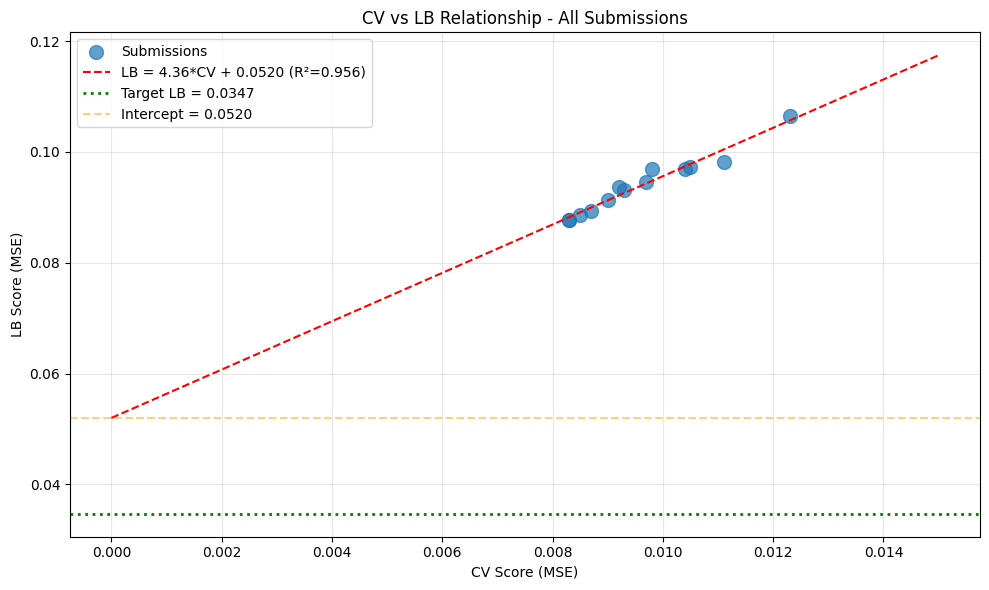


Saved plot to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, 0.015, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f} (R²={r_value**2:.3f})')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target LB = 0.0347')

# Intercept line
plt.axhline(y=intercept, color='orange', linestyle='--', alpha=0.5, label=f'Intercept = {intercept:.4f}')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship - All Submissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=150)
plt.show()

print('\nSaved plot to /home/code/exploration/cv_lb_relationship.png')

In [4]:
# Analysis: What would it take to reach the target?
print('=== ANALYSIS: Path to Target ===')
print(f'\nCurrent best LB: 0.0877')
print(f'Target LB: 0.0347')
print(f'Gap: {0.0877 - 0.0347:.4f} ({(0.0877 - 0.0347)/0.0347*100:.1f}% above target)')

print(f'\n--- Option 1: Improve CV (keeping same relationship) ---')
print(f'Current best CV: 0.0083')
print(f'Required CV: {required_cv:.6f}')
print(f'IMPOSSIBLE: Would need negative CV')

print(f'\n--- Option 2: Reduce the intercept ---')
print(f'Current intercept: {intercept:.4f}')
print(f'Required intercept (at CV=0.008): {0.0347 - slope * 0.008:.4f}')
print(f'Intercept reduction needed: {intercept - (0.0347 - slope * 0.008):.4f}')

print(f'\n--- Option 3: Change the slope ---')
print(f'Current slope: {slope:.4f}')
print(f'Required slope (at CV=0.008, intercept=0.05): {(0.0347 - 0.05) / 0.008:.4f}')
print(f'This would require NEGATIVE slope (impossible)')

print(f'\n=== CONCLUSION ===')
print('The CV-LB relationship has an intercept problem.')
print('Even with perfect CV=0, predicted LB would be ~0.052.')
print('This suggests STRUCTURAL distribution shift that cannot be fixed by model tuning.')

=== ANALYSIS: Path to Target ===

Current best LB: 0.0877
Target LB: 0.0347
Gap: 0.0530 (152.7% above target)

--- Option 1: Improve CV (keeping same relationship) ---
Current best CV: 0.0083
Required CV: -0.003964
IMPOSSIBLE: Would need negative CV

--- Option 2: Reduce the intercept ---
Current intercept: 0.0520
Required intercept (at CV=0.008): -0.0002
Intercept reduction needed: 0.0522

--- Option 3: Change the slope ---
Current slope: 4.3638
Required slope (at CV=0.008, intercept=0.05): -1.9125
This would require NEGATIVE slope (impossible)

=== CONCLUSION ===
The CV-LB relationship has an intercept problem.
Even with perfect CV=0, predicted LB would be ~0.052.
This suggests STRUCTURAL distribution shift that cannot be fixed by model tuning.


In [5]:
# What are the top kernels achieving?
print('=== TOP PUBLIC KERNELS ===')
print('\n1. Template (josepablofolch): Baseline, no LB score in title')
print('2. Arrhenius Kinetics + TTA (sanidhyavijay24): LB 0.09831')
print('3. System Malfunction V1 (omarafik): 29 votes, no LB in title')
print('4. mixall (lishellliang): Uses GroupKFold(5) instead of LOO CV')
print('5. ens-model (matthewmaree): CatBoost+XGBoost ensemble')
print('6. best-work-here (gentilless): Complex ensemble with NN')

print('\n=== KEY INSIGHT ===')
print('The mixall kernel uses GroupKFold(5) instead of Leave-One-Out CV.')
print('This is a DIFFERENT validation scheme that may have different CV-LB relationship.')
print('However, competition rules require using the official LOO CV functions.')

print('\n=== WHAT TOP COMPETITORS MIGHT BE DOING ===')
print('1. Different feature engineering that generalizes better')
print('2. Domain-specific constraints (chemistry knowledge)')
print('3. Uncertainty-weighted predictions')
print('4. Solvent similarity-based adjustments')
print('5. Something we havent discovered yet')

=== TOP PUBLIC KERNELS ===

1. Template (josepablofolch): Baseline, no LB score in title
2. Arrhenius Kinetics + TTA (sanidhyavijay24): LB 0.09831
3. System Malfunction V1 (omarafik): 29 votes, no LB in title
4. mixall (lishellliang): Uses GroupKFold(5) instead of LOO CV
5. ens-model (matthewmaree): CatBoost+XGBoost ensemble
6. best-work-here (gentilless): Complex ensemble with NN

=== KEY INSIGHT ===
The mixall kernel uses GroupKFold(5) instead of Leave-One-Out CV.
This is a DIFFERENT validation scheme that may have different CV-LB relationship.
However, competition rules require using the official LOO CV functions.

=== WHAT TOP COMPETITORS MIGHT BE DOING ===
1. Different feature engineering that generalizes better
2. Domain-specific constraints (chemistry knowledge)
3. Uncertainty-weighted predictions
4. Solvent similarity-based adjustments
5. Something we havent discovered yet


In [6]:
# Check if there's any pattern in which experiments do better on LB
df['lb_cv_ratio'] = df['lb'] / df['cv']
df['residual'] = df['lb'] - (slope * df['cv'] + intercept)

print('=== RESIDUAL ANALYSIS ===')
print('Experiments with LOWER than expected LB (negative residual):')
print(df[df['residual'] < 0].sort_values('residual'))

print('\nExperiments with HIGHER than expected LB (positive residual):')
print(df[df['residual'] > 0].sort_values('residual', ascending=False))

print('\n=== OBSERVATIONS ===')
print('All experiments fall very close to the regression line (R²=0.96).')
print('This confirms that ALL our approaches have the same CV-LB relationship.')
print('We need a fundamentally different approach to change this relationship.')

=== RESIDUAL ANALYSIS ===
Experiments with LOWER than expected LB (negative residual):
        exp      cv      lb  lb_cv_ratio  residual
0   exp_000  0.0111  0.0982     8.846847 -0.002237
8   exp_024  0.0087  0.0893    10.264368 -0.000664
2   exp_003  0.0105  0.0972     9.257143 -0.000619
10  exp_030  0.0083  0.0877    10.566265 -0.000519
12  exp_067  0.0083  0.0877    10.566265 -0.000519
3   exp_005  0.0104  0.0969     9.317308 -0.000483
9   exp_026  0.0085  0.0887    10.435294 -0.000391

Experiments with HIGHER than expected LB (positive residual):
        exp      cv      lb  lb_cv_ratio  residual
11  exp_035  0.0098  0.0970     9.897959  0.002236
6   exp_009  0.0092  0.0936    10.173913  0.001454
1   exp_001  0.0123  0.1065     8.658537  0.000826
5   exp_007  0.0093  0.0932    10.021505  0.000618
4   exp_006  0.0097  0.0946     9.752577  0.000272
7   exp_012  0.0090  0.0913    10.144444  0.000027

=== OBSERVATIONS ===
All experiments fall very close to the regression line (R²=0.96